## DB check
prices.dbが正しく調整されているか確認

In [79]:
#default package
import pickle

#third package
import sqlalchemy
from sqlalchemy import MetaData,Table,select
import pandas as pd
import matplotlib.pyplot as plt

#my package
import dat_to_csv as dtc

# config

In [80]:
table_name:str='prices'
db_name:str='mstock.db'
from_date:str='2010-01-01'

# engine作成

In [81]:
engine=dtc.create_engine(db_name)

In [82]:
with engine.connect() as conn:
    print(conn.close())

2020-10-06 19:43:01,806 INFO sqlalchemy.engine.base.Engine SELECT CAST(&#39;test plain returns&#39; AS VARCHAR(60)) AS anon_1
2020-10-06 19:43:01,808 INFO sqlalchemy.engine.base.Engine ()
2020-10-06 19:43:01,809 INFO sqlalchemy.engine.base.Engine SELECT CAST(&#39;test unicode returns&#39; AS VARCHAR(60)) AS anon_1
2020-10-06 19:43:01,810 INFO sqlalchemy.engine.base.Engine ()
None


# DBからload

In [83]:
meta=MetaData()
table=Table(table_name,meta,autoload=True,autoload_with=engine)

2020-10-06 19:43:02,471 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_xinfo(&quot;prices&quot;)
2020-10-06 19:43:02,472 INFO sqlalchemy.engine.base.Engine ()
2020-10-06 19:43:02,474 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = &#39;table&#39;
2020-10-06 19:43:02,474 INFO sqlalchemy.engine.base.Engine (&#39;prices&#39;,)
2020-10-06 19:43:02,475 INFO sqlalchemy.engine.base.Engine PRAGMA main.foreign_key_list(&quot;prices&quot;)
2020-10-06 19:43:02,476 INFO sqlalchemy.engine.base.Engine ()
2020-10-06 19:43:02,477 INFO sqlalchemy.engine.base.Engine PRAGMA temp.foreign_key_list(&quot;prices&quot;)
2020-10-06 19:43:02,477 INFO sqlalchemy.engine.base.Engine ()
2020-10-06 19:43:02,478 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = &#39;table&#39;
2020-10-06 19:43:02,478 INFO s

In [85]:
def read_stock_close(code:int,table:sqlalchemy.Table,conn,graph_num:int,from_date:str=from_date)->pd.Series:
    """指定した銘柄、日付以降の終値を取得"""
    stmt=table.select(table.c.code==code).where(table.c.date>from_date)
    df=pd.read_sql(stmt,conn)
    df.set_index('date',inplace=True)

    return df['close']

In [86]:
with open('codelist_core26.pkl','rb') as f:
    codelist26=pickle.load(f)

2020-10-06 19:59:04,323 INFO sqlalchemy.engine.base.Engine SELECT prices.code, prices.date, prices.open, prices.high, prices.low, prices.close, prices.volume, prices.adjust 
FROM prices 
WHERE prices.code = ? AND prices.date &gt; ?
2020-10-06 19:59:04,324 INFO sqlalchemy.engine.base.Engine (2914, &#39;2010-01-01&#39;)
2020-10-06 19:59:06,935 INFO sqlalchemy.engine.base.Engine SELECT prices.code, prices.date, prices.open, prices.high, prices.low, prices.close, prices.volume, prices.adjust 
FROM prices 
WHERE prices.code = ? AND prices.date &gt; ?
2020-10-06 19:59:06,936 INFO sqlalchemy.engine.base.Engine (3382, &#39;2010-01-01&#39;)
2020-10-06 19:59:09,496 INFO sqlalchemy.engine.base.Engine SELECT prices.code, prices.date, prices.open, prices.high, prices.low, prices.close, prices.volume, prices.adjust 
FROM prices 
WHERE prices.code = ? AND prices.date &gt; ?
2020-10-06 19:59:09,497 INFO sqlalchemy.engine.base.Engine (4063, &#39;2010-01-01&#39;)
2020-10-06 19:59:12,054 INFO sqlalchemy.

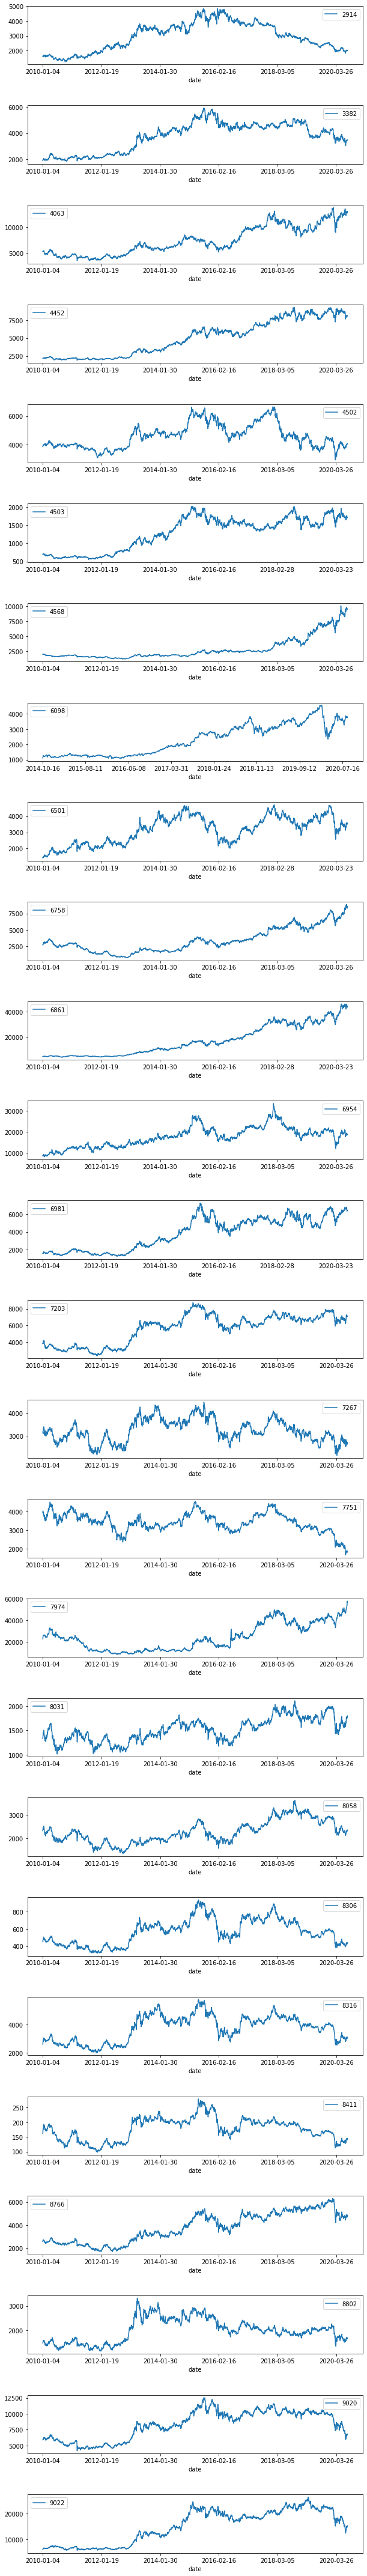

In [103]:
graph_num=len(codelist26)
fig, axes= plt.subplots(graph_num,figsize=(10,3*graph_num))
plt.subplots_adjust(wspace=0.4, hspace=0.7)
for idx,code in enumerate(codelist26[:graph_num]):
    with engine.connect() as conn:
      df=read_stock_close(code=code,table=table,conn=conn,graph_num=graph_num)
      #df=df[::100]
      df.plot(ax=axes[idx],label='%s'%(code))
      axes[idx].legend()
plt.savefig('stock_time_series.png')

2020-10-06 21:16:24,113 INFO sqlalchemy.engine.base.Engine SELECT prices.code, prices.date, prices.open, prices.high, prices.low, prices.close, prices.volume, prices.adjust 
FROM prices 
WHERE prices.code = ? AND prices.date &gt; ?
2020-10-06 21:16:24,114 INFO sqlalchemy.engine.base.Engine (2914, &#39;2018-01-01&#39;)
2020-10-06 21:16:26,709 INFO sqlalchemy.engine.base.Engine SELECT prices.code, prices.date, prices.open, prices.high, prices.low, prices.close, prices.volume, prices.adjust 
FROM prices 
WHERE prices.code = ? AND prices.date &gt; ?
2020-10-06 21:16:26,710 INFO sqlalchemy.engine.base.Engine (3382, &#39;2018-01-01&#39;)
2020-10-06 21:16:29,313 INFO sqlalchemy.engine.base.Engine SELECT prices.code, prices.date, prices.open, prices.high, prices.low, prices.close, prices.volume, prices.adjust 
FROM prices 
WHERE prices.code = ? AND prices.date &gt; ?
2020-10-06 21:16:29,313 INFO sqlalchemy.engine.base.Engine (4063, &#39;2018-01-01&#39;)
2020-10-06 21:16:31,897 INFO sqlalchemy.

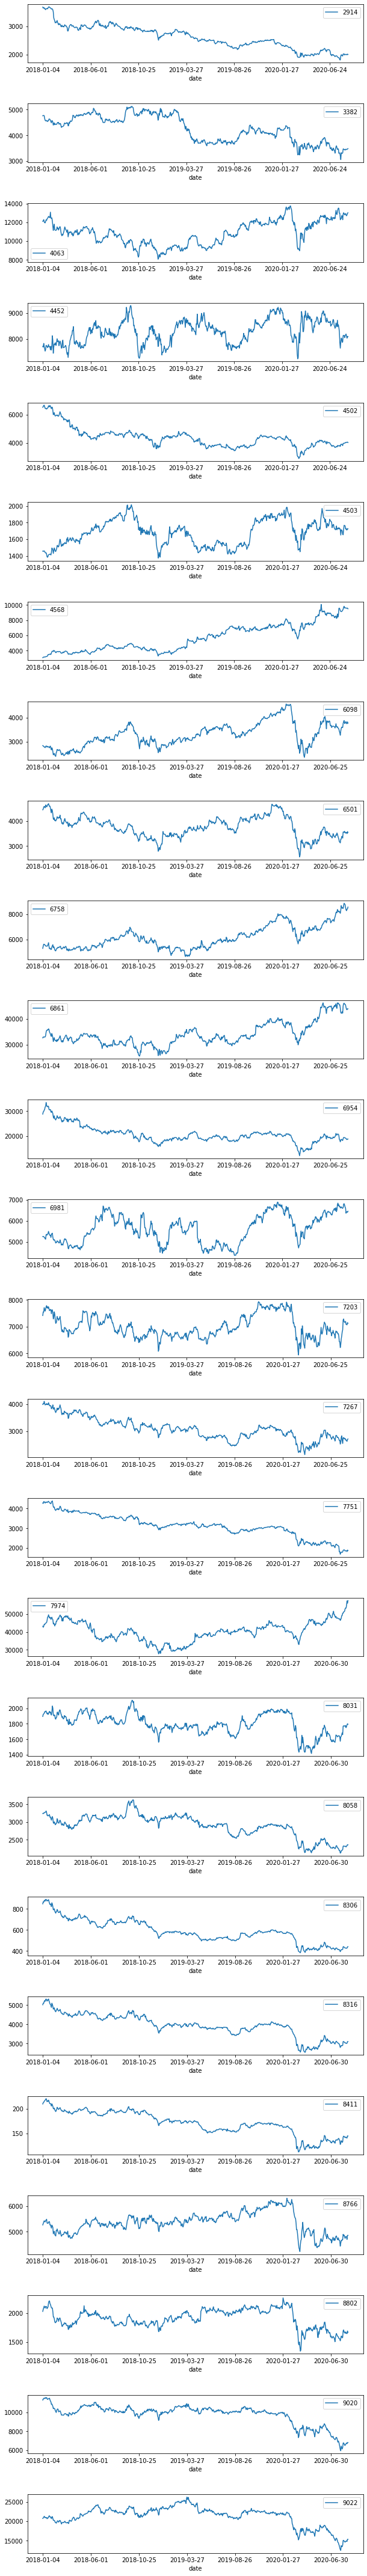

In [104]:
graph_num=len(codelist26)
fig, axes= plt.subplots(graph_num,figsize=(10,3*graph_num))
plt.subplots_adjust(wspace=0.4, hspace=0.7)
for idx,code in enumerate(codelist26[:graph_num]):
    with engine.connect() as conn:
      df=read_stock_close(code=code,table=table,conn=conn,graph_num=graph_num,from_date='2018-01-01')
      #df=df[::100]
      df.plot(ax=axes[idx],label='%s'%(code))
      axes[idx].legend()